In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import cross_val_score
from scipy.cluster.vq import whiten, kmeans, vq
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('weather.csv')

In [3]:
df

MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine WindGustDir  \
0        8.0     24.3       0.0          3.4       6.3          NW   
1       14.0     26.9       3.6          4.4       9.7         ENE   
2       13.7     23.4       3.6          5.8       3.3          NW   
3       13.3     15.5      39.8          7.2       9.1          NW   
4        7.6     16.1       2.8          5.6      10.6         SSE   
..       ...      ...       ...          ...       ...         ...   
361      9.0     30.7       0.0          7.6      12.1         NNW   
362      7.1     28.4       0.0         11.6      12.7           N   
363     12.5     19.9       0.0          8.4       5.3         ESE   
364     12.5     26.9       0.0          5.0       7.1          NW   
365     12.3     30.2       0.0          6.0      12.6          NW   

     WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  ...  Humidity3pm  \
0             30.0         SW         NW           6.0  ...           29   
1             39.0          E          W           4.0  ...           36   
2             85.0          N        NNE           6.0  ...           69   
3             54.0        WNW          W          30.0  ...           56   
4             50.0        SSE        ESE          20.0  ...           49   
..             ...        ...        ...           ...  ...          ...   
361           76.0        SSE         NW           7.0  ...           15   
362           48.0        NNW        NNW           2.0  ...           22   
363           43.0        ENE        ENE          11.0  ...           47   
364           46.0        SSW        WNW           6.0  ...           39   
365           78.0         NW        WNW          31.0  ...           13   

     Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  \
0         1019.7       1015.0         7         7     14.4     23.6   
1         1012.4       1008.4         5         3     17.5     25.7   
2         1009.5       1007.2         8         7     15.4     20.2   
3         1005.5       1007.0         2         7     13.5     14.1   
4         1018.3       1018.5         7         7     11.1     15.4   
..           ...          ...       ...       ...      ...      ...   
361       1016.1       1010.8         1         3     20.4     30.0   
362       1020.0       1016.9         0         1     17.2     28.2   
363       1024.0       1022.8         3         2     14.5     18.3   
364       1021.0       1016.2         6         7     15.8     25.9   
365       1009.6       1009.2         1         1     23.8     28.6   

     RainToday  RISK_MM RainTomorrow  
0           No      3.6          Yes  
1          Yes      3.6          Yes  
2          Yes     39.8          Yes  
3          Yes      2.8          Yes  
4          Yes      0.0           No  
..         ...      ...          ...  
361         No      0.0           No  
362         No      0.0           No  
363         No      0.0           No  
364         No      0.0           No  
365         No      0.0           No  

[366 rows x 22 columns]

In [4]:
obj_df = df.select_dtypes(include=['object'])
num_df = df.select_dtypes([np.number])

In [5]:
obj_df.fillna(obj_df.mode().iloc[0], inplace=True)

In [6]:
obj_df_label = obj_df.copy()

In [7]:
le = LabelEncoder()
obj_df_label = obj_df.apply(le.fit_transform)

In [8]:
obj_df_label

WindGustDir  WindDir9am  WindDir3pm  RainToday  RainTomorrow
0              7          12           7          0             1
1              1           0          13          1             1
2              7           3           5          1             1
3              7          14          13          1             1
4             10          10           2          1             0
..           ...         ...         ...        ...           ...
361            6          10           7          0             0
362            3           6           6          0             0
363            2           1           1          0             0
364            7          11          14          0             0
365            7           7          14          0             0

[366 rows x 5 columns]

In [9]:
obj_df_onehot = obj_df.copy()

In [10]:
obj_df_onehot = pd.get_dummies(obj_df_onehot, columns=obj_df_onehot.columns)

In [11]:
obj_df_onehot

WindGustDir_E  WindGustDir_ENE  WindGustDir_ESE  WindGustDir_N  \
0            False            False            False          False   
1            False             True            False          False   
2            False            False            False          False   
3            False            False            False          False   
4            False            False            False          False   
..             ...              ...              ...            ...   
361          False            False            False          False   
362          False            False            False           True   
363          False            False             True          False   
364          False            False            False          False   
365          False            False            False          False   

     WindGustDir_NE  WindGustDir_NNE  WindGustDir_NNW  WindGustDir_NW  \
0             False            False            False            True   
1             False            False            False           False   
2             False            False            False            True   
3             False            False            False            True   
4             False            False            False           False   
..              ...              ...              ...             ...   
361           False            False             True           False   
362           False            False            False           False   
363           False            False            False           False   
364           False            False            False            True   
365           False            False            False            True   

     WindGustDir_S  WindGustDir_SE  ...  WindDir3pm_SSE  WindDir3pm_SSW  \
0            False           False  ...           False           False   
1            False           False  ...           False           False   
2            False           False  ...           False           False   
3            False           False  ...           False           False   
4            False           False  ...           False           False   
..             ...             ...  ...             ...             ...   
361          False           False  ...           False           False   
362          False           False  ...           False           False   
363          False           False  ...           False           False   
364          False           False  ...           False           False   
365          False           False  ...           False           False   

     WindDir3pm_SW  WindDir3pm_W  WindDir3pm_WNW  WindDir3pm_WSW  \
0            False         False           False           False   
1            False          True           False           False   
2            False         False           False           False   
3            False          True           False           False   
4            False         False           False           False   
..             ...           ...             ...             ...   
361          False         False           False           False   
362          False         False           False           False   
363          False         False           False           False   
364          False         False            True           False   
365          False         False            True           False   

     RainToday_No  RainToday_Yes  RainTomorrow_No  RainTomorrow_Yes  
0            True          False            False              True  
1           False           True            False              True  
2           False           True            False              True  
3           False           True            False              True  
4           False           True             True             False  
..            ...            ...              ...               ...  
361          True          False             True             False

In [12]:
obj_df_binary = obj_df.copy()

In [13]:
obj_df.isnull().sum()

WindGustDir     0
WindDir9am      0
WindDir3pm      0
RainToday       0
RainTomorrow    0
dtype: int64

In [14]:
obj_df_binary.fillna(obj_df_binary.mode().iloc[0], inplace=True)


In [15]:
obj_df_binary

WindGustDir WindDir9am WindDir3pm RainToday RainTomorrow
0            NW         SW         NW        No          Yes
1           ENE          E          W       Yes          Yes
2            NW          N        NNE       Yes          Yes
3            NW        WNW          W       Yes          Yes
4           SSE        SSE        ESE       Yes           No
..          ...        ...        ...       ...          ...
361         NNW        SSE         NW        No           No
362           N        NNW        NNW        No           No
363         ESE        ENE        ENE        No           No
364          NW        SSW        WNW        No           No
365          NW         NW        WNW        No           No

[366 rows x 5 columns]

In [16]:
# lb = LabelBinarizer()
# obj_df_binary = lb.fit_transform(obj_df_binary)

In [17]:
num_df.isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         3
WindGustSpeed    2
WindSpeed9am     7
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RISK_MM          0
dtype: int64

In [18]:
num_df

MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
0        8.0     24.3       0.0          3.4       6.3           30.0   
1       14.0     26.9       3.6          4.4       9.7           39.0   
2       13.7     23.4       3.6          5.8       3.3           85.0   
3       13.3     15.5      39.8          7.2       9.1           54.0   
4        7.6     16.1       2.8          5.6      10.6           50.0   
..       ...      ...       ...          ...       ...            ...   
361      9.0     30.7       0.0          7.6      12.1           76.0   
362      7.1     28.4       0.0         11.6      12.7           48.0   
363     12.5     19.9       0.0          8.4       5.3           43.0   
364     12.5     26.9       0.0          5.0       7.1           46.0   
365     12.3     30.2       0.0          6.0      12.6           78.0   

     WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
0             6.0            20           68           29       1019.7   
1             4.0            17           80           36       1012.4   
2             6.0             6           82           69       1009.5   
3            30.0            24           62           56       1005.5   
4            20.0            28           68           49       1018.3   
..            ...           ...          ...          ...          ...   
361           7.0            50           38           15       1016.1   
362           2.0            19           45           22       1020.0   
363          11.0             9           63           47       1024.0   
364           6.0            28           69           39       1021.0   
365          31.0            35           43           13       1009.6   

     Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RISK_MM  
0         1015.0         7         7     14.4     23.6      3.6  
1         1008.4         5         3     17.5     25.7      3.6  
2         1007.2         8         7     15.4     20.2     39.8  
3         1007.0         2         7     13.5     14.1      2.8  
4         1018.5         7         7     11.1     15.4      0.0  
..           ...       ...       ...      ...      ...      ...  
361       1010.8         1         3     20.4     30.0      0.0  
362       1016.9         0         1     17.2     28.2      0.0  
363       1022.8         3         2     14.5     18.3      0.0  
364       1016.2         6         7     15.8     25.9      0.0  
365       1009.2         1         1     23.8     28.6      0.0  

[366 rows x 17 columns]

In [19]:
num_df_mean = num_df.copy()

In [20]:
num_df_mean.fillna(num_df_mean.mean().iloc[0], inplace=True)

In [21]:
num_df_mean.isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RISK_MM          0
dtype: int64

In [22]:
obj_df_label

WindGustDir  WindDir9am  WindDir3pm  RainToday  RainTomorrow
0              7          12           7          0             1
1              1           0          13          1             1
2              7           3           5          1             1
3              7          14          13          1             1
4             10          10           2          1             0
..           ...         ...         ...        ...           ...
361            6          10           7          0             0
362            3           6           6          0             0
363            2           1           1          0             0
364            7          11          14          0             0
365            7           7          14          0             0

[366 rows x 5 columns]

In [23]:
# Q1 = num_df_mean.quantile(0.25)
# Q3 = num_df_mean.quantile(0.75)
# IQR = Q3 - Q1
# lower_fence = Q1 - 1.5 * IQR
# upper_fence = Q3 + 1.5 * IQR
# num_df_mean = num_df_mean[~((num_df_mean < lower_fence) | (num_df_mean > upper_fence)).any(axis=1)]

In [24]:
processed_df = pd.concat([num_df_mean, obj_df_label], axis=1)

In [25]:
processed_df

MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
0        8.0     24.3       0.0          3.4       6.3           30.0   
1       14.0     26.9       3.6          4.4       9.7           39.0   
2       13.7     23.4       3.6          5.8       3.3           85.0   
3       13.3     15.5      39.8          7.2       9.1           54.0   
4        7.6     16.1       2.8          5.6      10.6           50.0   
..       ...      ...       ...          ...       ...            ...   
361      9.0     30.7       0.0          7.6      12.1           76.0   
362      7.1     28.4       0.0         11.6      12.7           48.0   
363     12.5     19.9       0.0          8.4       5.3           43.0   
364     12.5     26.9       0.0          5.0       7.1           46.0   
365     12.3     30.2       0.0          6.0      12.6           78.0   

     WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  ...  Cloud9am  \
0             6.0            20           68           29  ...         7   
1             4.0            17           80           36  ...         5   
2             6.0             6           82           69  ...         8   
3            30.0            24           62           56  ...         2   
4            20.0            28           68           49  ...         7   
..            ...           ...          ...          ...  ...       ...   
361           7.0            50           38           15  ...         1   
362           2.0            19           45           22  ...         0   
363          11.0             9           63           47  ...         3   
364           6.0            28           69           39  ...         6   
365          31.0            35           43           13  ...         1   

     Cloud3pm  Temp9am  Temp3pm  RISK_MM  WindGustDir  WindDir9am  WindDir3pm  \
0           7     14.4     23.6      3.6            7          12           7   
1           3     17.5     25.7      3.6            1           0          13   
2           7     15.4     20.2     39.8            7           3           5   
3           7     13.5     14.1      2.8            7          14          13   
4           7     11.1     15.4      0.0           10          10           2   
..        ...      ...      ...      ...          ...         ...         ...   
361         3     20.4     30.0      0.0            6          10           7   
362         1     17.2     28.2      0.0            3           6           6   
363         2     14.5     18.3      0.0            2           1           1   
364         7     15.8     25.9      0.0            7          11          14   
365         1     23.8     28.6      0.0            7           7          14   

     RainToday  RainTomorrow  
0            0             1  
1            1             1  
2            1             1  
3            1             1  
4            1             0  
..         ...           ...  
361          0             0  
362          0             0  
363          0             0  
364          0             0  
365          0             0  

[366 rows x 22 columns]

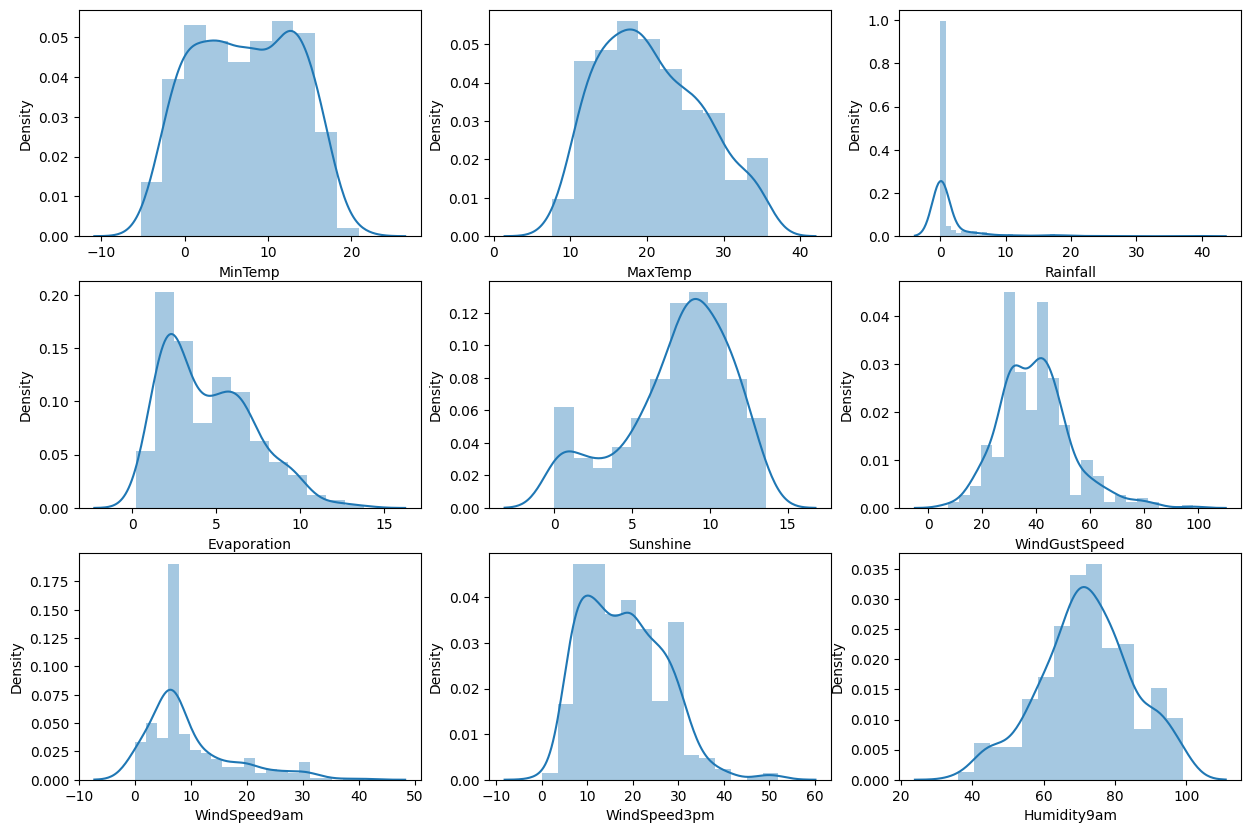

In [81]:
fig, ax = plt.subplots(3, 3, figsize=(15, 10))
for i, subplot in zip(processed_df.columns, ax.flatten()):
    sns.distplot(processed_df[i], ax=subplot)
plt.show()


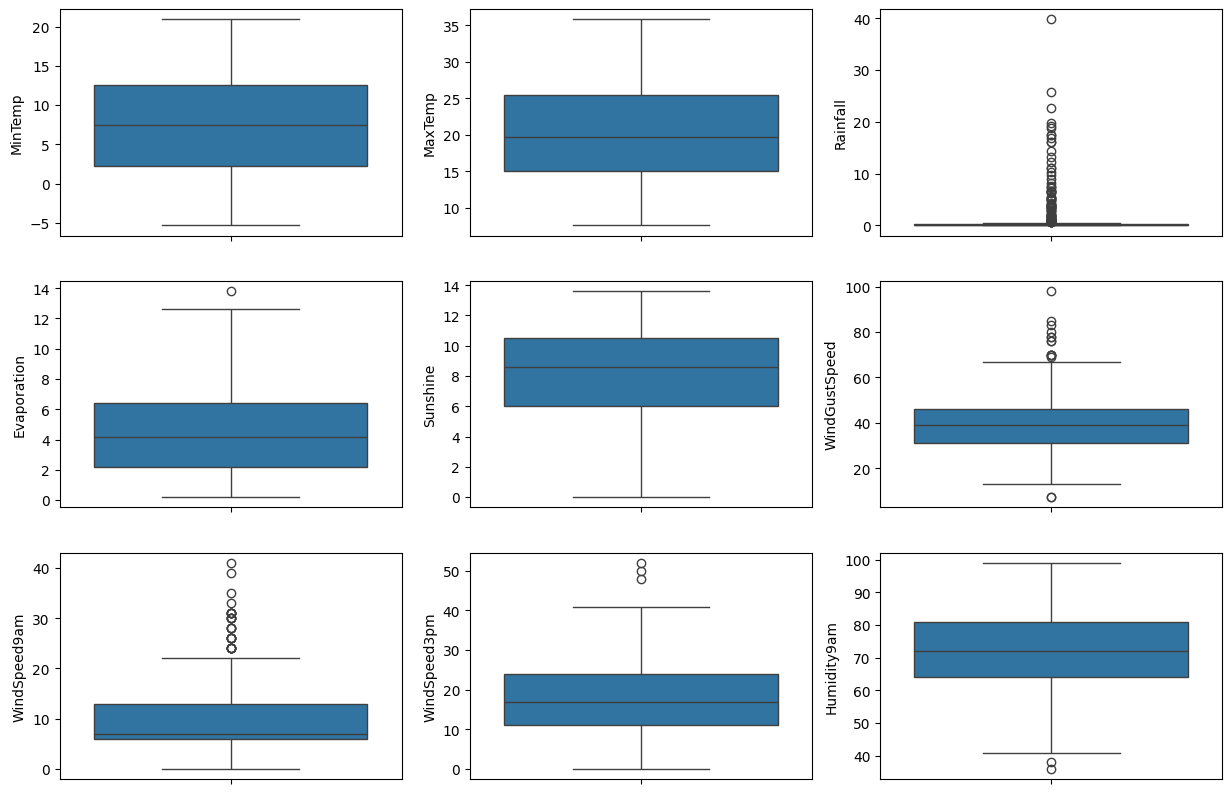

In [80]:
fig, ax = plt.subplots(3, 3, figsize=(15, 10))
for i, subplot in zip(processed_df.columns, ax.flatten()):
    sns.boxplot(processed_df[i], ax=subplot)
plt.show()

In [28]:
processed_df_log = processed_df.copy()

In [29]:
processed_df_log = np.log(processed_df_log)
processed_df_log = processed_df_log.replace([np.inf, -np.inf], np.nan)
np.seterr(divide = 'ignore')
warnings.filterwarnings('ignore') 

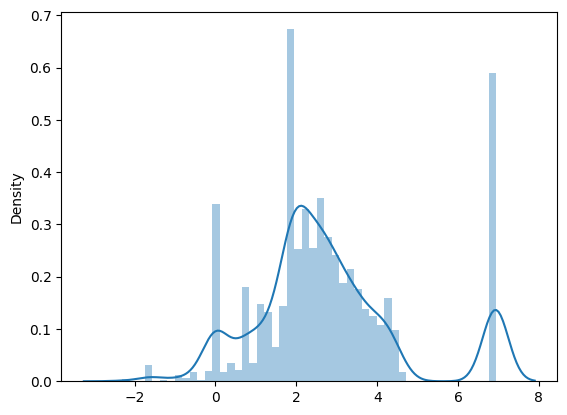

In [30]:
sns.distplot(processed_df_log)

In [31]:
processed_df_sqrt = processed_df.copy()

In [32]:
processed_df_sqrt = np.sqrt(processed_df_sqrt)

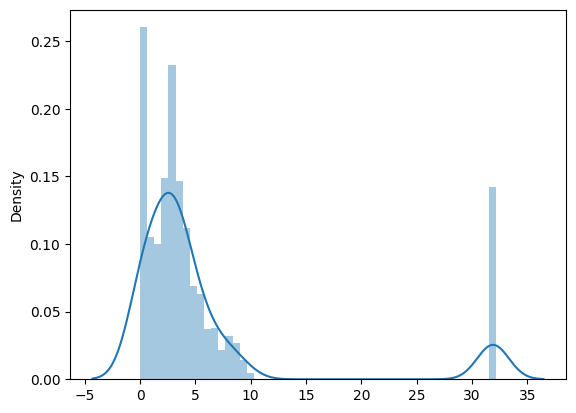

In [33]:
sns.distplot(processed_df_sqrt)
warnings.filterwarnings('ignore') 

In [34]:
processed_df_reciprocal = processed_df.copy()

In [35]:
processed_df_reciprocal = 1/processed_df_reciprocal
processed_df_reciprocal = processed_df_reciprocal.replace([np.inf, -np.inf], np.nan)

<Axes: ylabel='Density'>

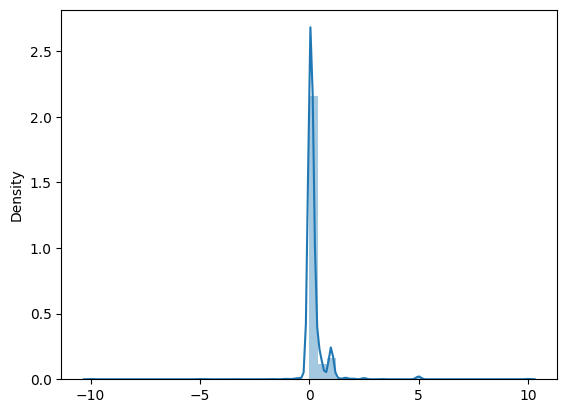

In [36]:
sns.distplot(processed_df_reciprocal)

In [86]:
processed_df.head()

MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
0      8.0     24.3       0.0          3.4       6.3           30.0   
1     14.0     26.9       3.6          4.4       9.7           39.0   
2     13.7     23.4       3.6          5.8       3.3           85.0   
3     13.3     15.5      39.8          7.2       9.1           54.0   
4      7.6     16.1       2.8          5.6      10.6           50.0   

   WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  ...  Cloud9am  \
0           6.0            20           68           29  ...         7   
1           4.0            17           80           36  ...         5   
2           6.0             6           82           69  ...         8   
3          30.0            24           62           56  ...         2   
4          20.0            28           68           49  ...         7   

   Cloud3pm  Temp9am  Temp3pm  RISK_MM  WindGustDir  WindDir9am  WindDir3pm  \
0         7     14.4     23.6      3.6            7          12           7   
1         3     17.5     25.7      3.6            1           0          13   
2         7     15.4     20.2     39.8            7           3           5   
3         7     13.5     14.1      2.8            7          14          13   
4         7     11.1     15.4      0.0           10          10           2   

   RainToday  RainTomorrow  
0          0             1  
1          1             1  
2          1             1  
3          1             1  
4          1             0  

[5 rows x 22 columns]

In [38]:
lr = LinearRegression()

In [39]:
X = processed_df.iloc[:,:-5]
y = processed_df.iloc[:, -5:]

In [40]:
y

WindGustDir  WindDir9am  WindDir3pm  RainToday  RainTomorrow
0              7          12           7          0             1
1              1           0          13          1             1
2              7           3           5          1             1
3              7          14          13          1             1
4             10          10           2          1             0
..           ...         ...         ...        ...           ...
361            6          10           7          0             0
362            3           6           6          0             0
363            2           1           1          0             0
364            7          11          14          0             0
365            7           7          14          0             0

[366 rows x 5 columns]

In [41]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [42]:
lr.fit(X_train,y_train)

y_pred = lr.predict(X_test)

r2_score(y_test,y_pred)

0.27407628542111473

In [43]:
pt1 = PowerTransformer()

X_train_transformed2 = pt1.fit_transform(X_train)
X_test_transformed2 = pt1.transform(X_test)

lr = LinearRegression()
lr.fit(X_train_transformed2,y_train)

y_pred3 = lr.predict(X_test_transformed2)

print(r2_score(y_test,y_pred3))

pd.DataFrame({'cols':X_train.columns,'Yeo_Johnson_lambdas':pt1.lambdas_})


0.36108092627846095


cols  Yeo_Johnson_lambdas
0         MinTemp             0.845582
1         MaxTemp             0.258255
2        Rainfall            -2.494539
3     Evaporation             0.146360
4        Sunshine             1.432938
5   WindGustSpeed             0.519691
6    WindSpeed9am             0.255951
7    WindSpeed3pm             0.452736
8     Humidity9am             1.266156
9     Humidity3pm             0.372768
10    Pressure9am            25.954197
11    Pressure3pm            22.063945
12       Cloud9am             0.299128
13       Cloud3pm             0.394528
14        Temp9am             0.811665
15        Temp3pm             0.426617
16        RISK_MM            -2.305938

In [44]:
pt = PowerTransformer()
X_transformed2 = pt.fit_transform(X)

lr = LinearRegression()
np.mean(cross_val_score(lr,X_transformed2,y,scoring='r2'))

0.30544757696266495

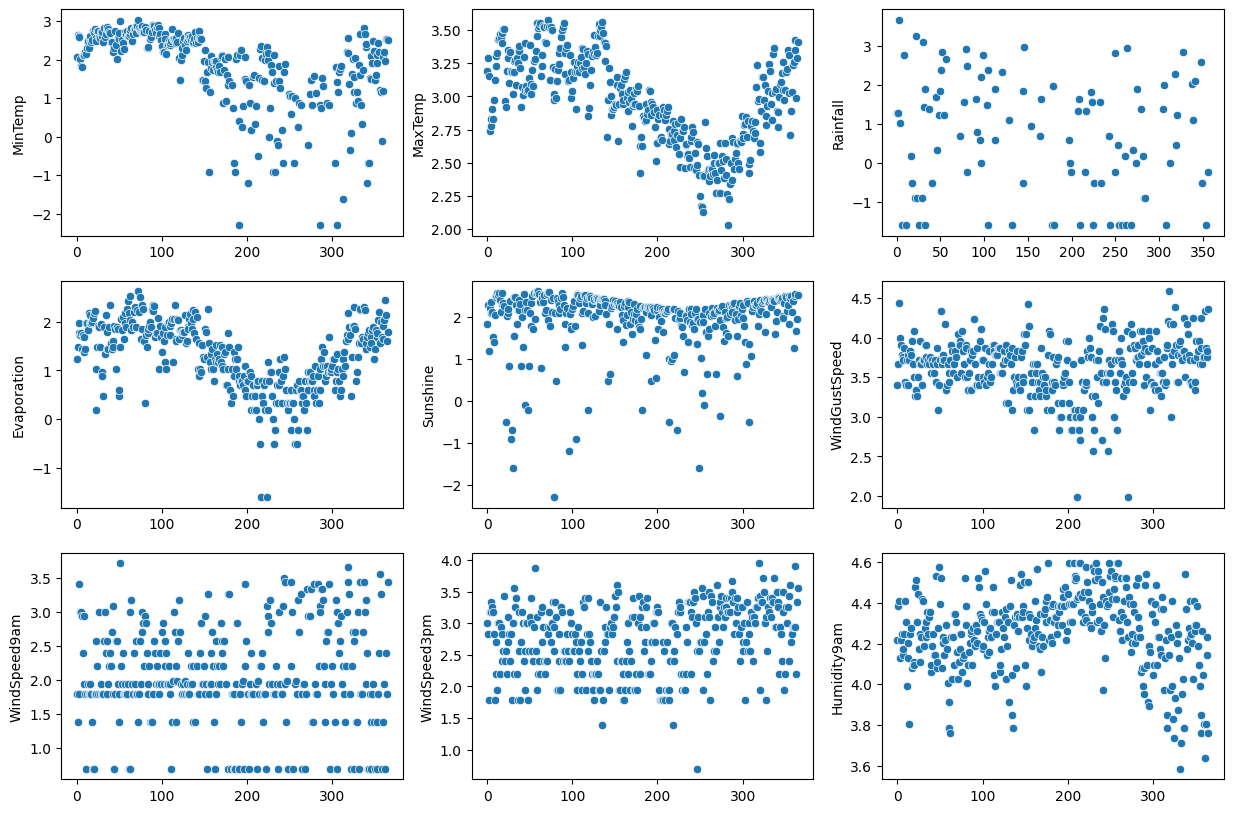

In [79]:
fig, ax = plt.subplots(3, 3, figsize=(15, 10))
for i, subplot in zip(processed_df_log.columns, ax.flatten()):
    sns.scatterplot(processed_df_log[i], ax=subplot)
plt.show()

<Axes: >

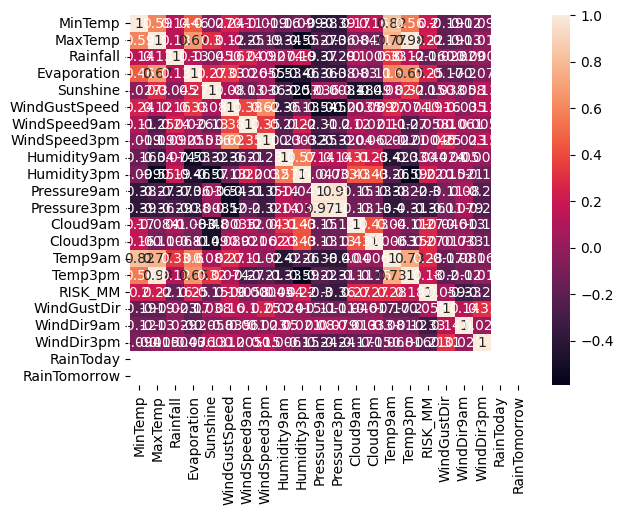

In [46]:
sns.heatmap(processed_df_log.corr(), annot=True)

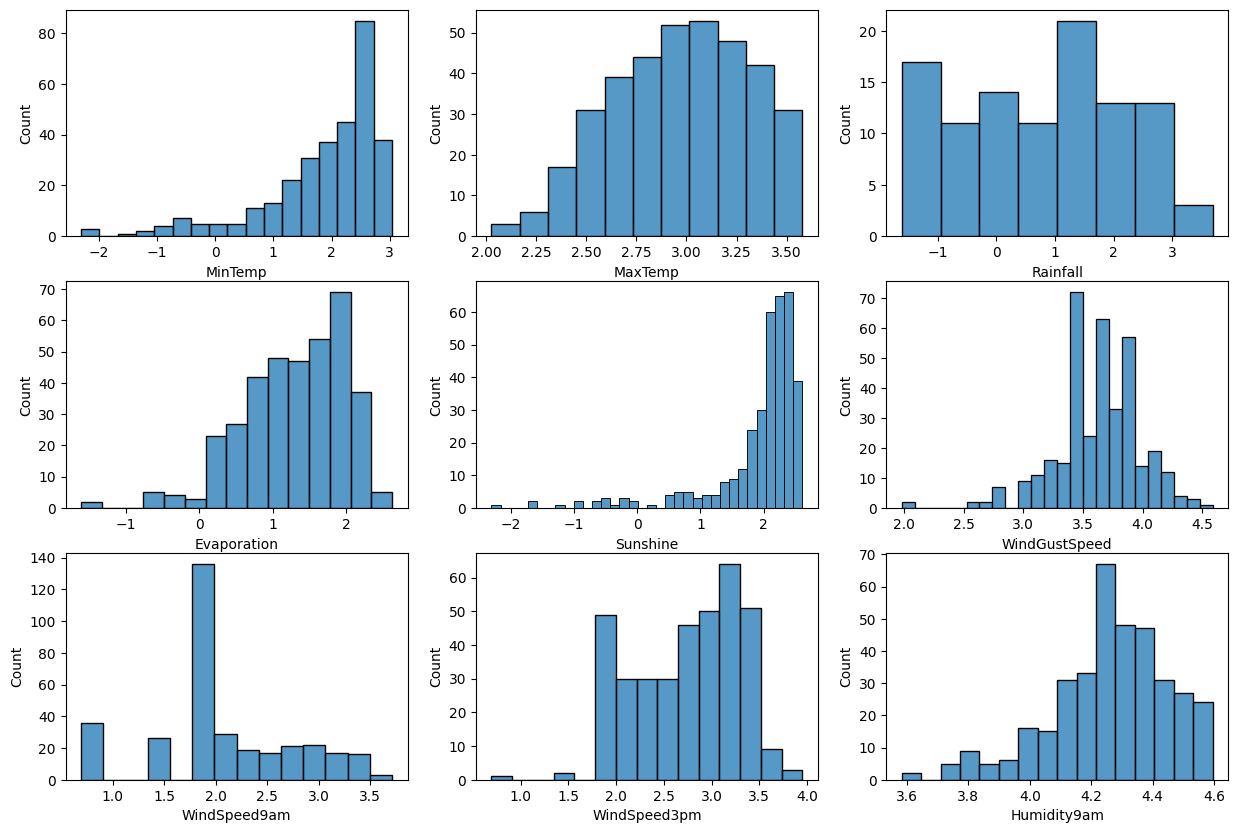

In [72]:
fig, ax = plt.subplots(3, 3, figsize=(15, 10))
for i, subplot in zip(processed_df_log.columns, ax.flatten()):
    sns.histplot(processed_df_log[i], ax=subplot)
plt.show()

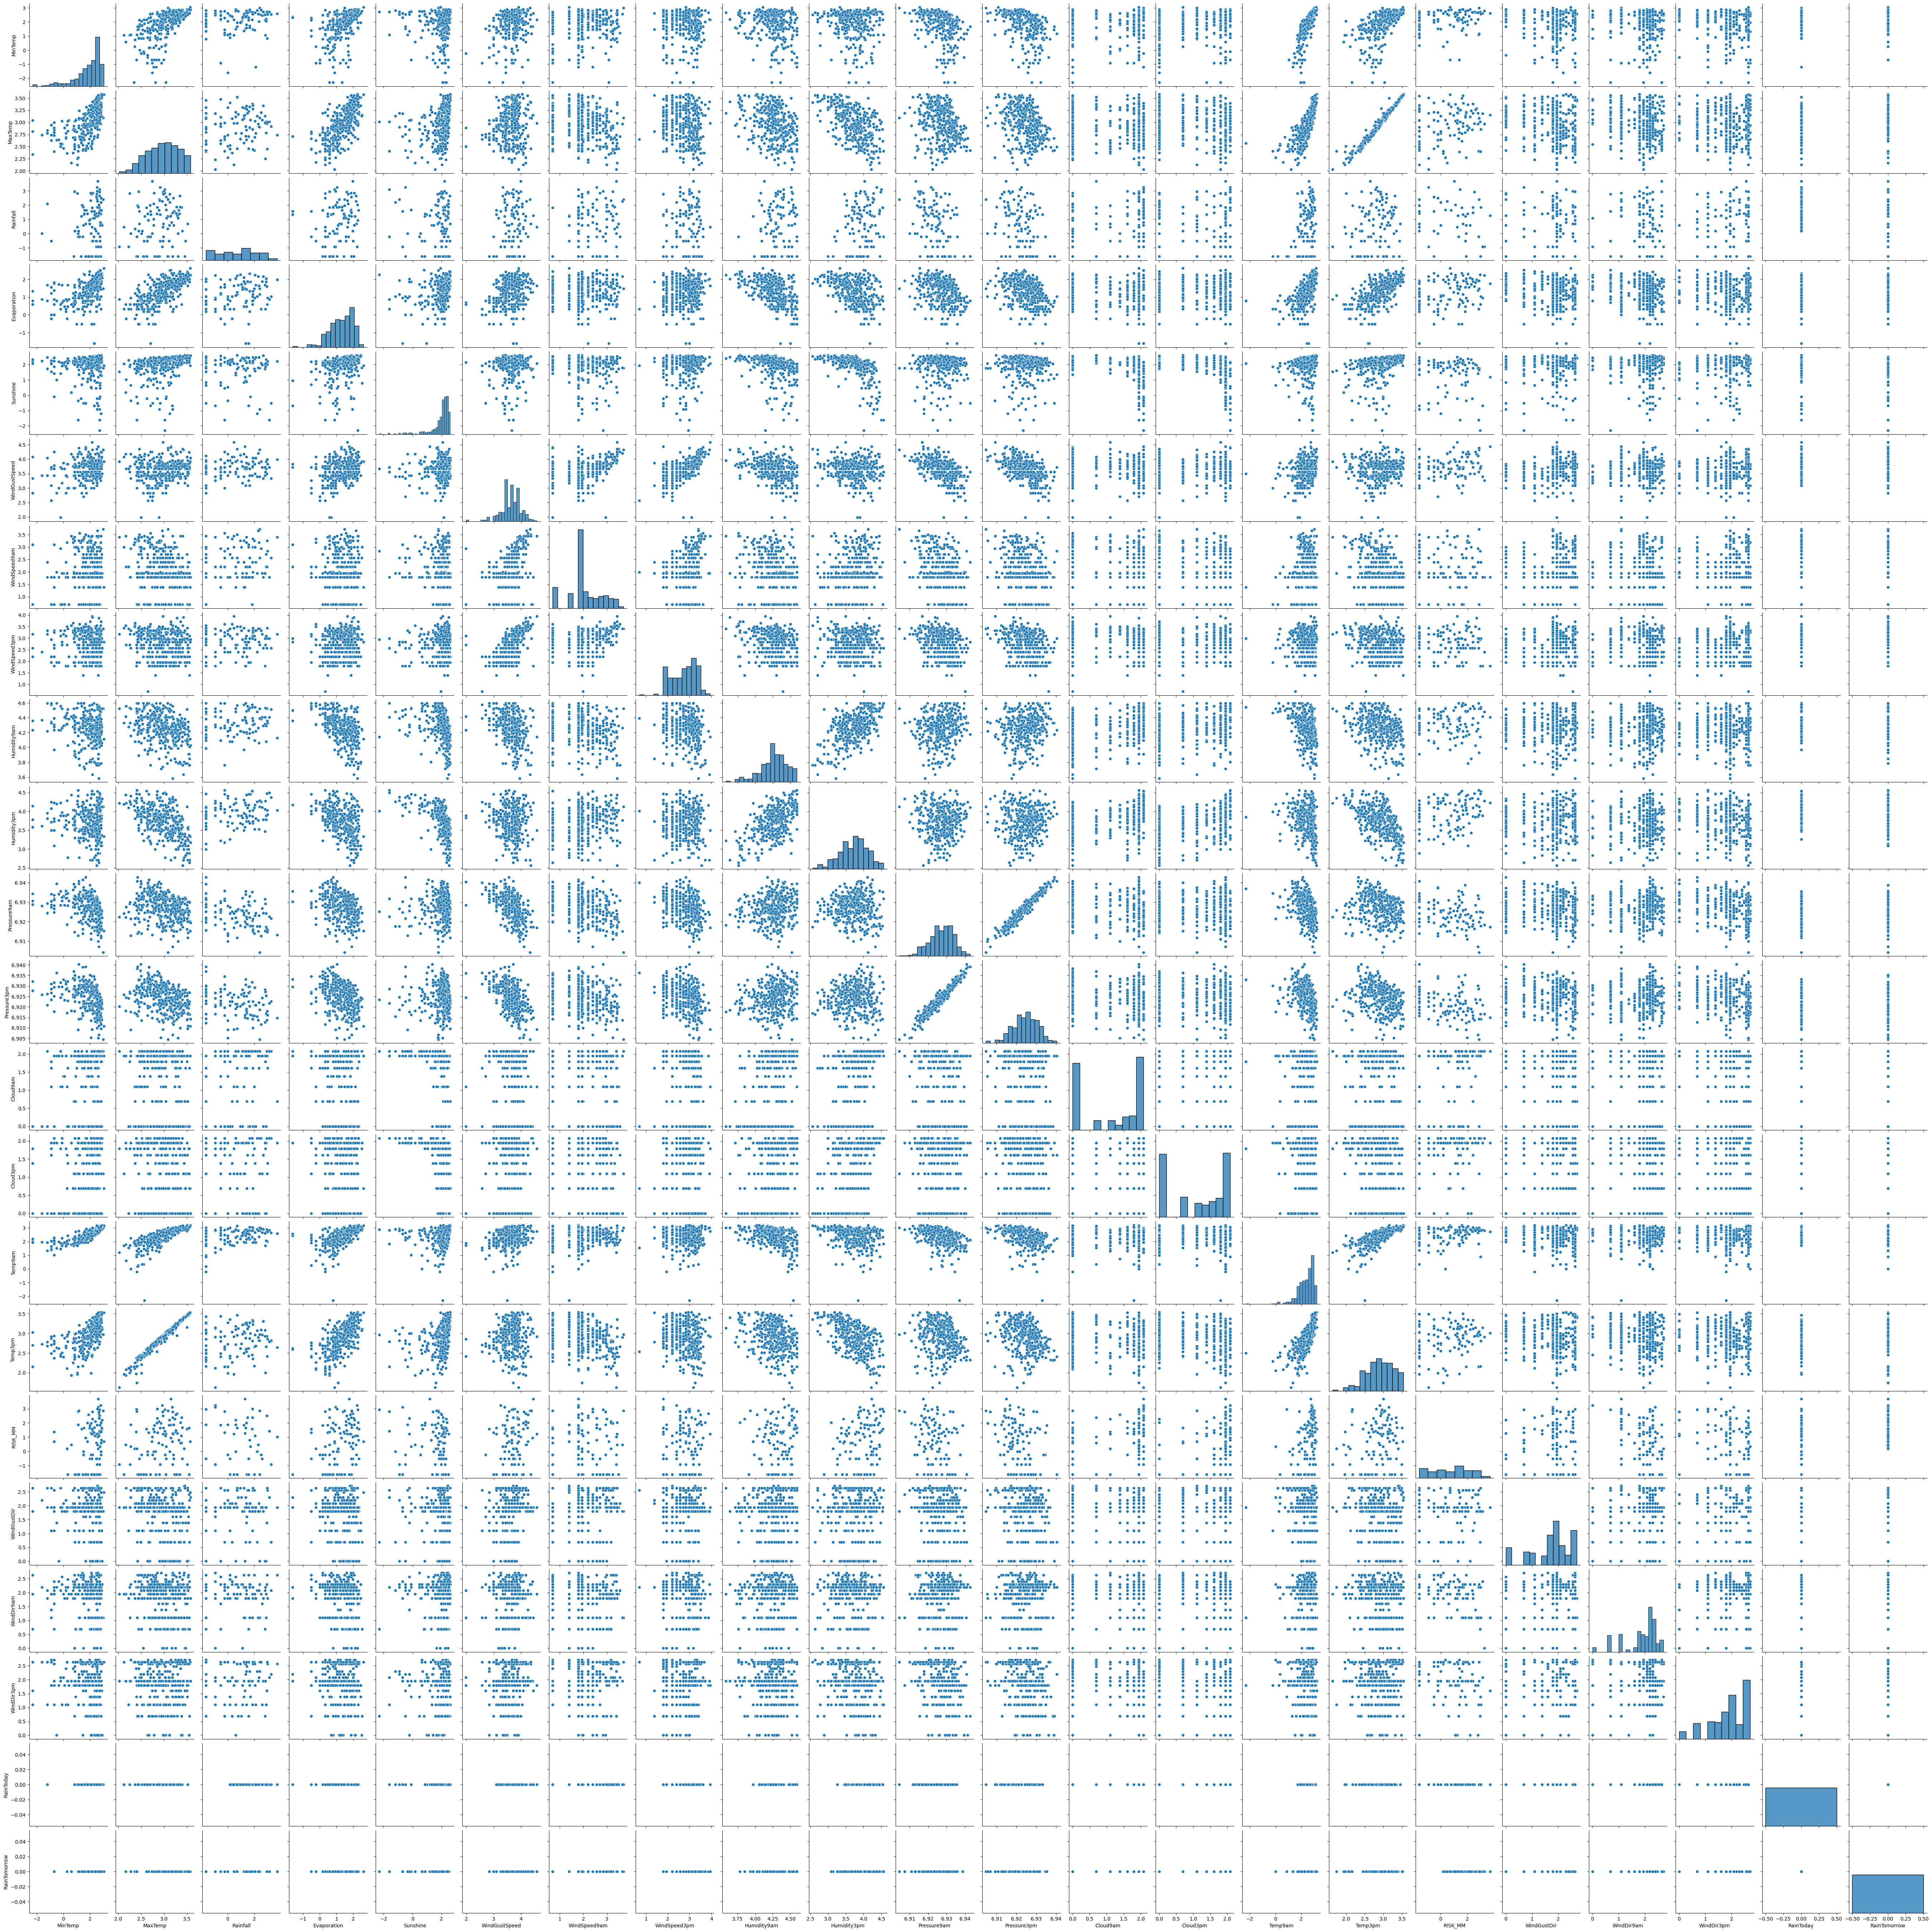

In [48]:
sns.pairplot(processed_df_log)

In [49]:
processed_df_log.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'RISK_MM', 'WindGustDir', 'WindDir9am',
       'WindDir3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [50]:
# sns.pairplot(pairplot_last, diag_kind= 'kde')

In [51]:
processed_df_log

MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
0    2.079442  3.190476       NaN     1.223775  1.840550       3.401197   
1    2.639057  3.292126  1.280934     1.481605  2.272126       3.663562   
2    2.617396  3.152736  1.280934     1.757858  1.193922       4.442651   
3    2.587764  2.740840  3.683867     1.974081  2.208274       3.988984   
4    2.028148  2.778819  1.029619     1.722767  2.360854       3.912023   
..        ...       ...       ...          ...       ...            ...   
361  2.197225  3.424263       NaN     2.028148  2.493205       4.330733   
362  1.960095  3.346389       NaN     2.451005  2.541602       3.871201   
363  2.525729  2.990720       NaN     2.128232  1.667707       3.761200   
364  2.525729  3.292126       NaN     1.609438  1.960095       3.828641   
365  2.509599  3.407842       NaN     1.791759  2.533697       4.356709   

     WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  ...  Cloud9am  \
0        1.791759      2.995732     4.219508     3.367296  ...  1.945910   
1        1.386294      2.833213     4.382027     3.583519  ...  1.609438   
2        1.791759      1.791759     4.406719     4.234107  ...  2.079442   
3        3.401197      3.178054     4.127134     4.025352  ...  0.693147   
4        2.995732      3.332205     4.219508     3.891820  ...  1.945910   
..            ...           ...          ...          ...  ...       ...   
361      1.945910      3.912023     3.637586     2.708050  ...  0.000000   
362      0.693147      2.944439     3.806662     3.091042  ...       NaN   
363      2.397895      2.197225     4.143135     3.850148  ...  1.098612   
364      1.791759      3.332205     4.234107     3.663562  ...  1.791759   
365      3.433987      3.555348     3.761200     2.564949  ...  0.000000   

     Cloud3pm   Temp9am   Temp3pm   RISK_MM  WindGustDir  WindDir9am  \
0    1.945910  2.667228  3.161247  1.280934     1.945910    2.484907   
1    1.098612  2.862201  3.246491  1.280934     0.000000         NaN   
2    1.945910  2.734368  3.005683  3.683867     1.945910    1.098612   
3    1.945910  2.602690  2.646175  1.029619     1.945910    2.639057   
4    1.945910  2.406945  2.734368       NaN     2.302585    2.302585   
..        ...       ...       ...       ...          ...         ...   
361  1.098612  3.015535  3.401197       NaN     1.791759    2.302585   
362  0.000000  2.844909  3.339322       NaN     1.098612    1.791759   
363  0.693147  2.674149  2.906901       NaN     0.693147    0.000000   
364  1.945910  2.760010  3.254243       NaN     1.945910    2.397895   
365  0.000000  3.169686  3.353407       NaN     1.945910    1.945910   

     WindDir3pm  RainToday  RainTomorrow  
0      1.945910        NaN           0.0  
1      2.564949        0.0           0.0  
2      1.609438        0.0           0.0  
3      2.564949        0.0           0.0  
4      0.693147        0.0           NaN  
..          ...        ...           ...  
361    1.945910        NaN           NaN  
362    1.791759        NaN           NaN  
363    0.000000        NaN           NaN  
364    2.639057        NaN           NaN  
365    2.639057        NaN           NaN  

[366 rows x 22 columns]

In [52]:
processed_df_log_new = processed_df_log.copy()
for i in processed_df_log_new.columns:
    processed_df_log_new[i] = processed_df_log_new[i].replace(np.nan, processed_df_log_new[i].mean())

In [82]:
# processed_df_log_new

In [54]:
W = processed_df_log_new.iloc[:,:-1]
V = processed_df_log_new.iloc[:,-1]


In [85]:
# print("Data :\n", W, "\n")

In [56]:
W = whiten(W)

In [57]:
centroids, mean_dist = kmeans(W, 2)
print("Code-book :\n", centroids, "\n")

Code-book :
 [[2.52210223e+00 9.53420945e+00 1.01201283e+00 2.56172339e+00
  2.75176729e+00 1.05582082e+01 2.96989569e+00 5.13882326e+00
  2.17590122e+01 9.07017914e+00 1.05621531e+03 1.08825750e+03
  1.35172903e+00 1.38487484e+00 4.33229197e+00 8.53975666e+00
  1.06884954e+00 2.21303459e+00 2.95462803e+00 2.71024468e+00
  0.00000000e+00]
 [1.33264334e+00 7.97570784e+00 7.86389251e-01 1.12030518e+00
  2.39969657e+00 9.90075228e+00 2.96679099e+00 5.14015655e+00
  2.24817321e+01 9.78932981e+00 1.05716151e+03 1.08928294e+03
  1.31231602e+00 1.32296791e+00 2.94173335e+00 7.03639851e+00
  7.22282725e-01 2.65915202e+00 3.41978484e+00 2.81204609e+00
  0.00000000e+00]] 



In [58]:
clusters, dist = vq(W, centroids)
print("Clusters :\n", clusters, "\n")

Clusters :
 [0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 1 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 1 1 0 0 0 0 0 1 1 0 0 0
 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0] 



In [59]:
cluster1 = list(clusters).count(0)
 
cluster2 = list(clusters).count(1)

In [60]:
kmeanss = KMeans(n_clusters=2, random_state=42)

In [61]:
silhouette_score(W, kmeanss.fit_predict(W))

0.16255911532588155

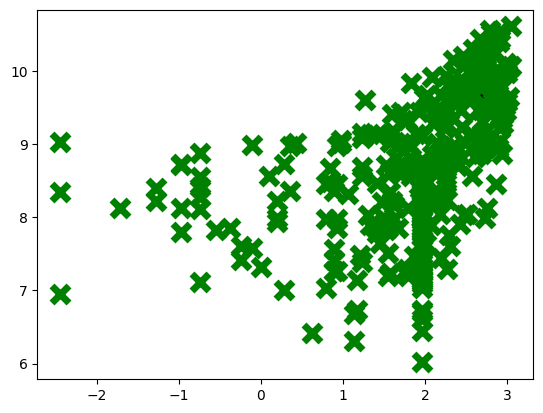

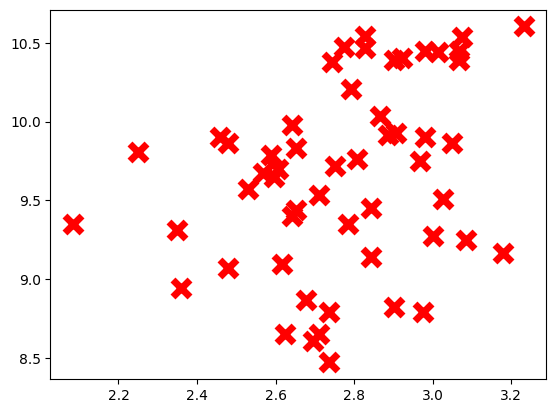

In [62]:
colors = 10*["g","r","c","b","k"]

class K_Means:
    def __init__(self, k=2, tol=0.001, max_iter=300):
        self.k = k
        self.tol = tol
        self.max_iter = max_iter
    def fit(self,data):

        self.centroids = {}

        for i in range(self.k):
            self.centroids[i] = data[i]
        for i in range(self.max_iter):
            self.classifications = {}

            for i in range(self.k):
                self.classifications[i] = []

            for featureset in data:
                distances = [np.linalg.norm(featureset-self.centroids[centroid]) for centroid in self.centroids]
                classification = distances.index(min(distances))
                self.classifications[classification].append(featureset)
            
            prev_centroids = dict(self.centroids)

            for classification in self.classifications:
                self.centroids[classification] = np.average(self.classifications[classification],axis=0)

            optimized = True

            for c in self.centroids:
                original_centroid = prev_centroids[c]
                current_centroid = self.centroids[c]
                if np.sum((current_centroid-original_centroid)/original_centroid*100.0) > self.tol:
                    print(np.sum((current_centroid-original_centroid)/original_centroid*100.0))
                    optimized = False

            if optimized:
                break

    def predict(self,data):
            distances = [np.linalg.norm(data-self.centroids[centroid]) for centroid in self.centroids]
            classification = distances.index(min(distances))
            return classification

clf = K_Means()
clf.fit(W)

for centroid in clf.centroids:
    plt.scatter(clf.centroids[centroid][0], clf.centroids[centroid][1],
    marker="o", color="k", s=150, linewidths=5)

for classification in clf.classifications:
    color = colors[classification]
    for featureset in clf.classifications[classification]:
        plt.scatter(featureset[0], featureset[1], marker="x", color=color, s=150, linewidths=5)
    plt.show()